## Physical damped and driven pendulum 


The driven damped pendulum is very rich system to study with chaotic behaviour. For a sufficiently weak driving force, the behavior of the driven damped pendulum is of course close to that of the driven damped linear oscillator, but on gradually increasing the driving force, at a certain strength the period of the response doubles, then, with further increase, it doubles again and again, at geometrically decreasing intervals, going to a chaotic (nonperiodic) response at a definite driving strength. This reminds us of the `Logistic map` we studied earlier, and indeed `r` in logistic map has a similar role as the driving force of the pendulum.


Physical driven pendulum with damping has the equations

$$m l^2 \frac{d^2\theta}{dt^2}=-{m g l}\sin\theta - b \frac{d\theta}{dt} + a\cos(\Omega t)$$

see <a url="https://en.wikipedia.org/wiki/Pendulum_(mechanics)">Wikipedia Pendulum</a>.

Here ${m g l}\sin\theta$ is the force of gravity, $b \frac{d\theta}{dt}$ is damping, and $a\sin(\Omega t)$ is the external force, which is periodic with some frequency $\Omega$. Note that damping here is linear in velocity, as opposed to quadratic in projectile motion, because motion is much slower, where the linear term usually dominates over the quadratic. At high speeds, the quadratic drag dominates and linear is usually neglected.


This equation can be recast into:
$$\frac{d^2\theta}{dt^2}=-\omega^2\sin\theta - B \frac{d\theta}{dt} + A\omega^2\cos(\Omega t)$$
where
$\omega=\sqrt{\frac{g}{l}}$, $B=\frac{b}{m l^2}$ and $A=\frac{a}{mgl}$

For sufficiently strong driving force A the pendulum is chaotic. We will choose the values that were used by Talyor, namely, $\omega=1.5$, $\Omega=1$, $B=0.75$, and changing $A$ from 0.9 to 1.5. At $A\approx 1.0829$ the system first becomes chaotic. Than at $A=1.35$ it has a single period, at $A=1.44$ a double period, and at $A=1.465$ has period 4, and around $1.5$ is again chaotic.

For more information, see the <a href="https://galileoandeinstein.phys.virginia.edu/7010/CM_22a_Period_Doubling_Chaos.html">lecture by Michael Fowler</a>

In [1]:
import numpy as np
from math import *

def D_driven(t, y, w2=1, B=0.75, A=0, Om=1):
    """Driven pendulum EOM
    d/dt[theta,dtheta/dt] = [dtheta/dt, -w2*sin(theta)-B*dtheta/dt+A*w2*cos(Om*t)]
    """
    return np.array([y[1],-w2*sin(y[0])-B*y[1]+A*w2*cos(Om*t)])

In [2]:
from scipy.integrate import solve_ivp

tf=2000.  # end time. We want it to be as long as possible
A=1.0    # this driving force > 1.09 should be chaotic
(w2,B,Om)=(1.5**2,0.75,1.) # Taylor's values
sol1=solve_ivp(D_driven, [0,tf], [0,0], atol=1e-10, rtol=1e-6, args=(w2,B,A,Om))
print(sol1)
sol2=solve_ivp(D_driven, [0,tf], [1e-6,0], atol=1e-10, rtol=1e-6, args=(w2,B,A,Om))

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 98192
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.00000000e-04, 1.10000000e-03, ...,
       1.99981946e+03, 1.99996305e+03, 2.00000000e+03])
 t_events: None
        y: array([[0.00000000e+00, 1.12497187e-08, 1.36087529e-06, ...,
        2.61906716e+00, 2.65250317e+00, 2.65488358e+00],
       [0.00000000e+00, 2.24991561e-04, 2.47397772e-03, ...,
        3.65325286e-01, 9.92876484e-02, 2.94327008e-02]])
 y_events: None


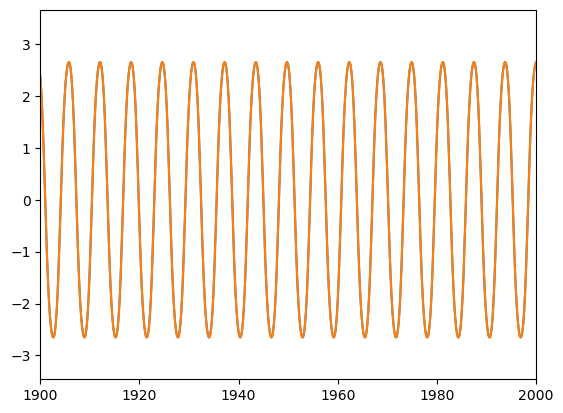

In [3]:
import matplotlib.pyplot as plt
plt.plot(sol1.t, sol1.y[0])
plt.plot(sol2.t, sol2.y[0])
plt.xlim(1900,2000);

It is instructive to plot the `Phase Space` trajectory: $\dot{\theta}(\theta)$
For Harmonic oscilator it is a circle. When the system has single fixed point, it becomes single curve. The double period would show two curves. Once the system is chaotic, it covers a 2D space volume.

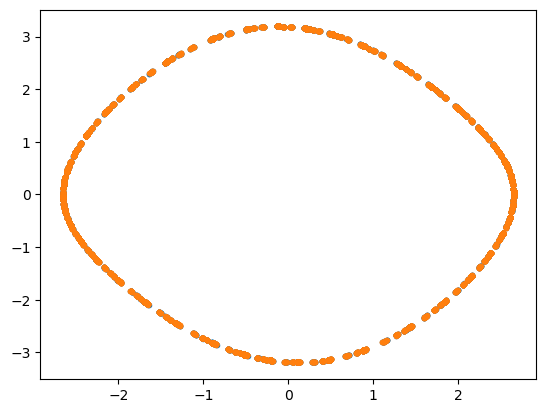

In [4]:
N2 = int(len(sol1.y[0])/2)
plt.plot((sol1.y[0,N2:]+pi)%(2*pi)-pi,sol1.y[1,N2:], '.')
plt.plot((sol2.y[0,N2:]+pi)%(2*pi)-pi,sol2.y[1,N2:], '.');

This `Phase Space` is simple, similar to a simple harmonic oscilator.

In [5]:
tf=2000.
A=1.09
(w2,B,Om)=(1.5**2,0.75,1.)
sol1=solve_ivp(D_driven, [0,tf], [0,0], atol=1e-10, rtol=1e-6, args=(w2,B,A,Om))
print(sol1)
sol2=solve_ivp(D_driven, [0,tf], [1e-6,0], atol=1e-10, rtol=1e-6, args=(w2,B,A,Om))

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 88250
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.00000000e-04, 1.10000000e-03, ...,
       1.99970803e+03, 1.99988107e+03, 2.00000000e+03])
 t_events: None
        y: array([[0.00000000e+00, 1.22621934e-08, 1.48335406e-06, ...,
        8.21360172e+00, 8.35319859e+00, 8.39670829e+00],
       [0.00000000e+00, 2.45240802e-04, 2.69663572e-03, ...,
        1.07294043e+00, 5.43739936e-01, 1.88681110e-01]])
 y_events: None


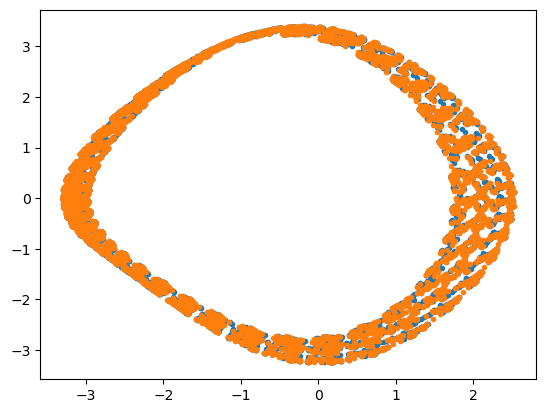

In [6]:
N2 = int(len(sol1.y[0])/2)
plt.plot((sol1.y[0,N2:]+pi*1.1)%(2*pi)-pi*1.1,sol1.y[1,N2:], '.')
plt.plot((sol2.y[0,N2:]+pi*1.1)%(2*pi)-pi*1.1,sol2.y[1,N2:], '.')

In [7]:
from scipy.integrate import solve_ivp

tf=2000.  # end time. We want it to be as long as possible
A=1.35    # this driving force > 1.09 should be chaotic
(w2,B,Om)=(1.5**2,0.75,1.) # Taylor's values
sol1=solve_ivp(D_driven, [0,tf], [0,0], atol=1e-10, rtol=1e-6, args=(w2,B,A,Om))
print(sol1)
sol2=solve_ivp(D_driven, [0,tf], [1e-6,0], atol=1e-10, rtol=1e-6, args=(w2,B,A,Om))

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 82208
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.00000000e-04, 1.10000000e-03, ...,
       1.99970858e+03, 1.99989108e+03, 2.00000000e+03])
 t_events: None
        y: array([[ 0.00000000e+00,  1.51871203e-08,  1.83718164e-06, ...,
        -1.99615675e+03, -1.99620538e+03, -1.99627507e+03],
       [ 0.00000000e+00,  3.03738608e-04,  3.33986992e-03, ...,
        -4.41959491e-02, -4.95976911e-01, -7.86037997e-01]])
 y_events: None


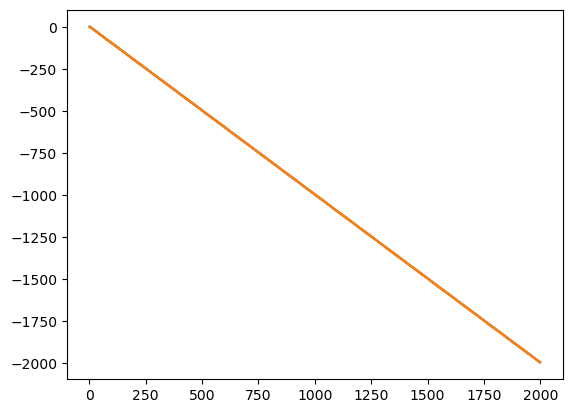

In [8]:
import matplotlib.pyplot as plt
plt.plot(sol1.t, sol1.y[0])
plt.plot(sol2.t, sol2.y[0])

(1950.0, 2000.0)

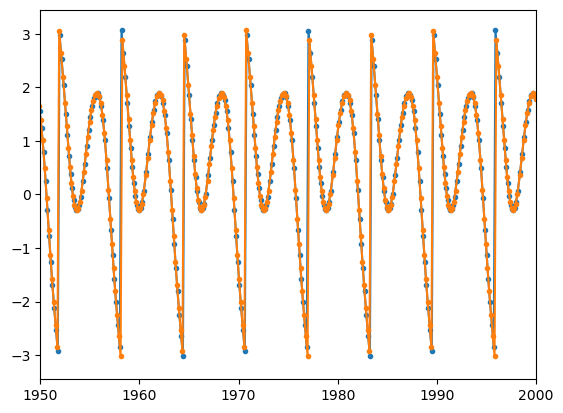

In [9]:
plt.plot(sol1.t, (sol1.y[0]+pi)%(2*pi)-pi,'.-')
plt.plot(sol2.t, (sol2.y[0]+pi)%(2*pi)-pi,'.-')
plt.xlim(1950,2000)

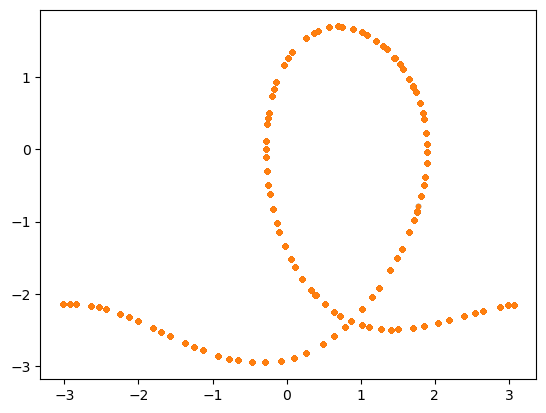

In [10]:
N2 = int(len(sol1.y[0])/2)
plt.plot((sol1.y[0,N2:]+pi)%(2*pi)-pi,sol1.y[1,N2:], '.')
plt.plot((sol2.y[0,N2:]+pi)%(2*pi)-pi,sol2.y[1,N2:], '.');

In [11]:
tf=2000.
A=1.44 #1.08
(w2,B,Om)=(1.5**2,0.75,1.)
sol1=solve_ivp(D_driven, [0,tf], [0,0], atol=1e-10, rtol=1e-6, args=(w2,B,A,Om))
print(sol1)
sol2=solve_ivp(D_driven, [0,tf], [1e-6,0], atol=1e-10, rtol=1e-6, args=(w2,B,A,Om))

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 88640
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.00000000e-04, 1.10000000e-03, ...,
       1.99979143e+03, 1.99992763e+03, 2.00000000e+03])
 t_events: None
        y: array([[ 0.00000000e+00,  1.61995950e-08,  1.95966041e-06, ...,
        -1.99549342e+03, -1.99547662e+03, -1.99548377e+03],
       [ 0.00000000e+00,  3.23987849e-04,  3.56252792e-03, ...,
         2.61791507e-01, -1.93115264e-02, -1.79728452e-01]])
 y_events: None


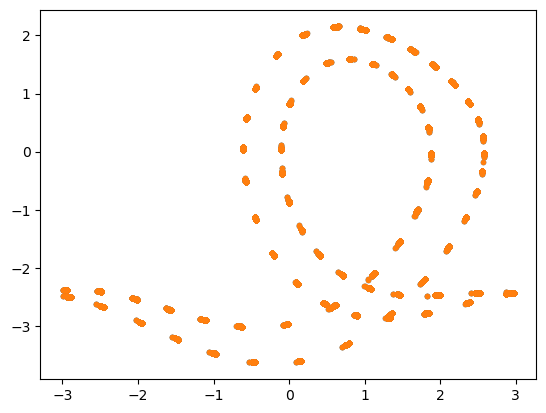

In [12]:
N2 = int(len(sol1.y[0])/2)
plt.plot((sol1.y[0,N2:]+pi)%(2*pi)-pi,sol1.y[1,N2:], '.')
plt.plot((sol2.y[0,N2:]+pi)%(2*pi)-pi,sol2.y[1,N2:], '.')

In [13]:
tf=2000.
A=1.465
(w2,B,Om)=(1.5**2,0.75,1.)
sol1=solve_ivp(D_driven, [0,tf], [0,0], atol=1e-10, rtol=1e-6, args=(w2,B,A,Om))
print(sol1)
sol2=solve_ivp(D_driven, [0,tf], [1e-6,0], atol=1e-10, rtol=1e-6, args=(w2,B,A,Om))

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 86054
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.00000000e-04, 1.10000000e-03, ...,
       1.99968190e+03, 1.99985867e+03, 2.00000000e+03])
 t_events: None
        y: array([[ 0.00000000e+00,  1.64808379e-08,  1.99368230e-06, ...,
        -1.99658330e+03, -1.99665758e+03, -1.99677285e+03],
       [ 0.00000000e+00,  3.29612638e-04,  3.62437736e-03, ...,
        -2.11925756e-01, -6.35372348e-01, -9.98509711e-01]])
 y_events: None


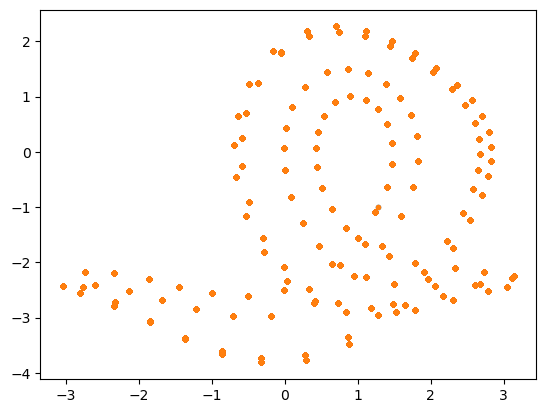

In [14]:
N2 = int(len(sol1.y[0])/2)
plt.plot((sol1.y[0,N2:]+pi)%(2*pi)-pi,sol1.y[1,N2:], '.')
plt.plot((sol2.y[0,N2:]+pi)%(2*pi)-pi,sol2.y[1,N2:], '.')

In [15]:
tf=2000.
A=1.5
(w2,B,Om)=(1.5**2,0.75,1.)
sol1=solve_ivp(D_driven, [0,tf], [0,0], atol=1e-10, rtol=1e-6, args=(w2,B,A,Om))
print(sol1)
sol2=solve_ivp(D_driven, [0,tf], [1e-6,0], atol=1e-10, rtol=1e-6, args=(w2,B,A,Om))

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 86834
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.00000000e-04, 1.10000000e-03, ...,
       1.99973815e+03, 1.99990905e+03, 2.00000000e+03])
 t_events: None
        y: array([[ 0.00000000e+00,  1.68745781e-08,  2.04131293e-06, ...,
        -5.35036878e+01, -5.33735176e+01, -5.33202447e+01],
       [ 0.00000000e+00,  3.37487342e-04,  3.71096658e-03, ...,
         8.71616400e-01,  6.48714221e-01,  5.21598633e-01]])
 y_events: None


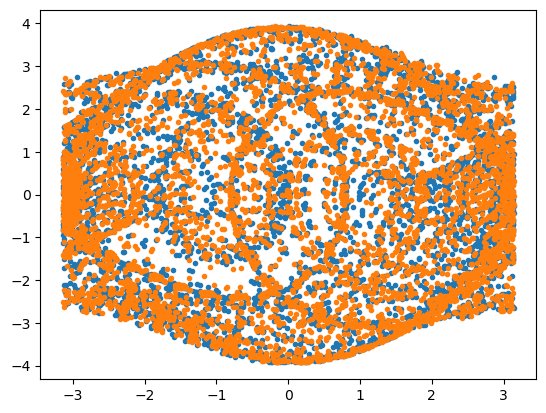

In [16]:
N2 = int(len(sol1.y[0])/2)
plt.plot((sol1.y[0,N2:]+pi)%(2*pi)-pi,sol1.y[1,N2:], '.')
plt.plot((sol2.y[0,N2:]+pi)%(2*pi)-pi,sol2.y[1,N2:], '.')

Even though the initial conditions differ for $10^{-6}$ the two solutions are completely different at long times. This means that Lyapunov exponent is positive. It is possible to calculate it, but we will not attempt that here.